In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/FINAL_COMBINED_AUGMENT_DATASET_FOR_PAPER_FOR_MODEL2"

In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)

['Fresh', 'NonFresh']


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

Fresh
NonFresh


##### don't run augmentation

Augmentation

seperating training and testing data

In [ ]:
trainx0=[]
testx0=[]
trainy0=[]
testy0=[]
count=0
for file in File:
  path=os.path.join(directory,file)
  t=0
  for im in os.listdir(path):
    image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(50,50))
    image=img_to_array(image)
    image=image/255.0
    n=len(os.listdir(path))
    if t<(n//10)*8:
        trainx0.append(image)
        trainy0.append(count)
    else:   
        testx0.append(image)
        testy0.append(count)
    t+=1
  count=count+1
  print(len(trainx0), len(testx0), len(trainy0), len(testy0))

680 178 680 178
1320 341 1320 341


In [ ]:
print(len(trainx0), len(testx0), len(trainy0), len(testy0))

1320 341 1320 341


In [ ]:

trainy2=to_categorical(trainy0)
X_train=np.array(trainx0).reshape(-1,50,50,3)
y_train=np.array(trainy2)

In [ ]:
X_test=np.array(testx0).reshape(-1,50,50,3)

Splitting training data into training and validation

In [ ]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1056, 50, 50, 3)
(264, 50, 50, 3)
(1056, 2)
(264, 2)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

Developing Model

In [ ]:
pretrained_model3 = tf.keras.applications.VGG19(input_shape=(50,50,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model Training

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
33/33 [==============================] - 12s 60ms/step - loss: 0.4668 - accuracy: 0.7936 - val_loss: 0.4600 - val_accuracy: 0.7652
Epoch 2/20
33/33 [==============================] - 1s 36ms/step - loss: 0.2726 - accuracy: 0.8826 - val_loss: 0.3414 - val_accuracy: 0.8409
Epoch 3/20
33/33 [==============================] - 1s 36ms/step - loss: 0.2718 - accuracy: 0.8778 - val_loss: 0.4261 - val_accuracy: 0.8258
Epoch 4/20
33/33 [==============================] - 1s 36ms/step - loss: 0.2410 - accuracy: 0.9006 - val_loss: 0.3637 - val_accuracy: 0.8371
Epoch 5/20
33/33 [==============================] - 1s 36ms/step - loss: 0.2172 - accuracy: 0.9081 - val_loss: 0.2285 - val_accuracy: 0.9091
Epoch 6/20
33/33 [==============================] - 2s 52ms/step - loss: 0.2203 - accuracy: 0.9167 - val_loss: 0.1737 - val_accuracy: 0.9242
Epoch 7/20
33/33 [==============================] - 1s 42ms/step - loss: 0.1859 - accuracy: 0.9290 - val_loss: 0.2053 - val_accuracy: 0.9129
Epoch 8/20
3

Model Validation

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

9/9 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       126
           1       0.98      0.93      0.95       138

    accuracy                           0.95       264
   macro avg       0.95      0.95      0.95       264
weighted avg       0.95      0.95      0.95       264



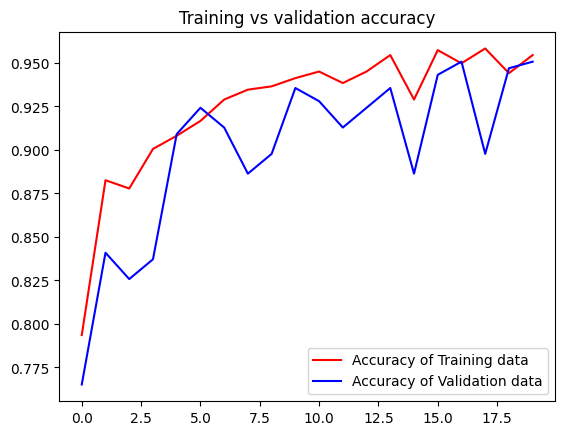

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

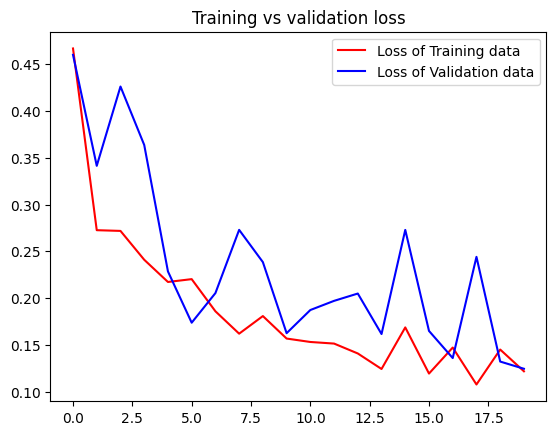

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Model Evaluation

In [ ]:
pred2=model.predict(X_test)
print(pred2[0:10])

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

11/11 [==============================] - 1s 49ms/step
[[9.9994898e-01 5.1019135e-05]
 [9.9930120e-01 6.9880887e-04]
 [9.9999881e-01 1.1893333e-06]
 [9.9988282e-01 1.1714074e-04]
 [9.9994695e-01 5.3044725e-05]
 [9.9999642e-01 3.5889709e-06]
 [9.9928182e-01 7.1819610e-04]
 [9.9998939e-01 1.0622453e-05]
 [9.9998224e-01 1.7781773e-05]
 [9.9990010e-01 9.9932993e-05]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
ANS=testy0
ANS[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9648093841642229


Testing

In [ ]:
directory_test = "/content/drive/MyDrive/Test_purpose_281122"

In [ ]:
test_File=[]
for file in os.listdir(directory_test):
    test_File+=[file]
    print(file)

NonfreshEyes.webp
FreshFishEyes.jpg
NonFreshEyes1.jpeg
fresh_gills1.jfif
fresh_gills17-12.jfif
fresh_eyes17-12.jfif
fresh_eyes2.jfif
NF.png
Fresh.jpg
NonFreshEyes.jpeg


In [ ]:
for file in test_File:
  path0 = os.path.join(directory_test, file)
  image=load_img(path0,target_size=(50,50))

  image=img_to_array(image) 
  image=image/255.0
  prediction_image=np.array(image)
  prediction_image= np.expand_dims(image, axis=0)
  prediction=model.predict(prediction_image)
  value=np.argmax(prediction)
  move_name=mapper(value)
  print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 266ms/step
Prediction is NonFresh.
1/1 [==============================] - 0s 30ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 29ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 26ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 26ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 19ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 19ms/step
Prediction is Fresh.
1/1 [==============================] - 0s 19ms/step
Prediction is NonFresh.
1/1 [==============================] - 0s 19ms/step
Prediction is NonFresh.
1/1 [==============================] - 0s 20ms/step
Prediction is NonFresh.


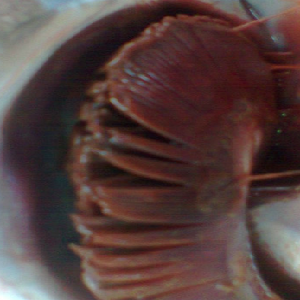

In [ ]:
path0 = "/content/drive/MyDrive/Test_purpose_281122/NF.png"
load_img(path0,target_size=(300,300))

In [ ]:
image=load_img(path0,target_size=(50,50))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 20ms/step
Prediction is NonFresh.
